# Preparing, Creating and Analyzing Meaningful Data Visualizations for IoT Sensor Data

The goal of this notebook is to take a dataset relating to the IoT sector (in this case, about sensors) and create insightful visualizations.

In [22]:
# Loading in some basic Python libraries. We will use pandas and matplotlib to begin
import pandas as pd
import matplotlib.pyplot as plt

### What dataset will we be using?

This dataset describes environmental sensor telemetry data. Sensor telemetry is a valuable tool used by researchers/scientists/engineers to monitor and understand physical environments by collecting and analyzing data in real time.
The data comes from a series of three identical, custom-built, breadboard-based sensor arrays, each connected to a Raspberry Pi microprocessor. Each of these three IoT devices were placed in varied environmental conditions:

                           | device            | environmental conditions                 |
                           |-------------------|------------------------------------------|
                           | 00:0f:00:70:91:0a | stable conditions, cooler and more humid |
                           | 1c:bf:ce:15:ec:4d | highly variable temperature and humidity |
                           | b8:27:eb:bf:9d:51 | stable conditions, warmer and dryer      |

The features generated from the sensors include the temperature, humidity, carbon monoxide (CO), liquid petroleum gas (LPG), smoke, light, and motion of their environment. Each IoT device collected readings from the sensors on a regular interval. The timestamp of each reading is also included in the dataset.

If you would like to read more and access this dataset for yourself, you can find it through this link: https://www.kaggle.com/datasets/garystafford/environmental-sensor-data-132k

In [23]:
# Reading the csv dataset into our Python environment
df = pd.read_csv('iot_telemetry_data.csv')

df.head() # Only first few rows of data for viewing clarity

ts             device        co   humidity  light       lpg  \
0  1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
1  1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
2  1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
3  1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
4  1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   

   motion     smoke       temp  
0   False  0.020411  22.700000  
1   False  0.013275  19.700001  
2   False  0.020475  22.600000  
3   False  0.018628  27.000000  
4   False  0.020448  22.600000

### Let's see what .info() and .describe() from the pandas library can tell us about our dataset!

In [24]:
# Concise Dataset Summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB
None


In our dataset, there are:

- 9 columns and 405184 rows
- 2 boolean columns, 6 float64 columns, and 1 object column
- no missing values from any columns! Each column has 405184 non-null values.
    
Shown below is a descriptive statistical analysis done to show the mean, std, min, max, etc. of the values in each of the numerical columns.

In [25]:
# Descriptive Statistics
print(df.describe())

                 ts             co       humidity            lpg  \
count  4.051840e+05  405184.000000  405184.000000  405184.000000   
mean   1.594858e+09       0.004639      60.511694       0.007237   
std    1.994984e+05       0.001250      11.366489       0.001444   
min    1.594512e+09       0.001171       1.100000       0.002693   
25%    1.594686e+09       0.003919      51.000000       0.006456   
50%    1.594858e+09       0.004812      54.900000       0.007489   
75%    1.595031e+09       0.005409      74.300003       0.008150   
max    1.595203e+09       0.014420      99.900002       0.016567   

               smoke           temp  
count  405184.000000  405184.000000  
mean        0.019264      22.453987  
std         0.004086       2.698347  
min         0.006692       0.000000  
25%         0.017024      19.900000  
50%         0.019950      22.200000  
75%         0.021838      23.600000  
max         0.046590      30.600000  


### Numerical summaries are great to start, but it is time to visualize some of the data for a better understanding!

We'll begin by recreating the dataframe to be grouped by the device name. This will allow us to better understand each environment using the visualizations we are about to create. Let's plot the temperature over time for each device.

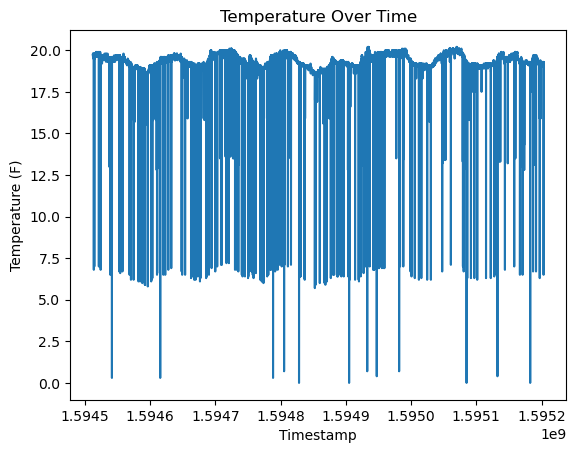

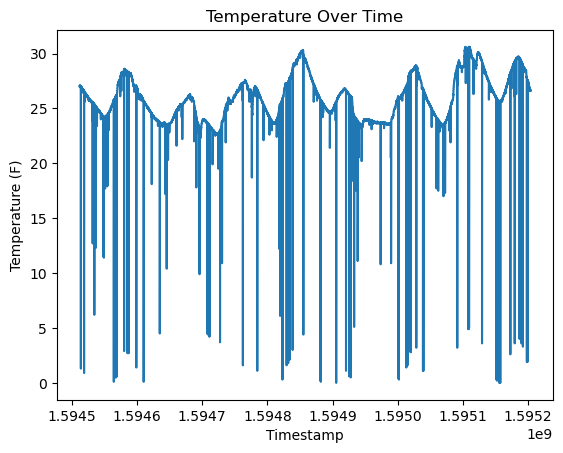

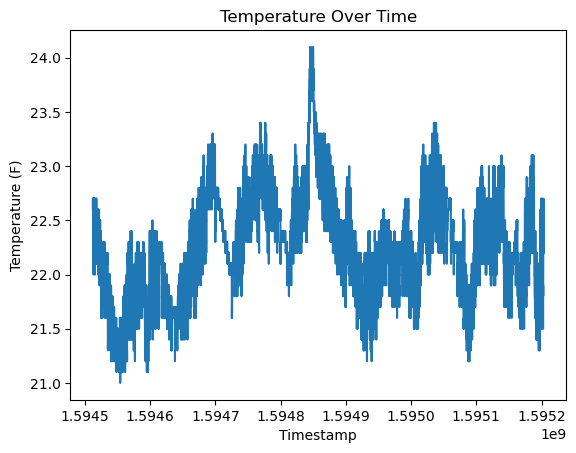

In [26]:
# Data Visualization Analysis
# Plot of Temperature vs Time
grouped_df = df.groupby('device')
for device, device_group in grouped_df:
    plt.plot(device_group['ts'], device_group['temp'])
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature (F)')
    plt.title('Temperature Over Time')
    plt.show()

The plots comparing the temperature over time seem to fluctuate heavily and have high variance over small timeframes. This makes it hard to draw any meaningful analyses. This could be because there are so many data points. In order to filter the data to be more readable, we can use a moving average of the temperature. We do not want to filter the data too much that we lose any important information, though.

### Let's filter the data and plot it again!

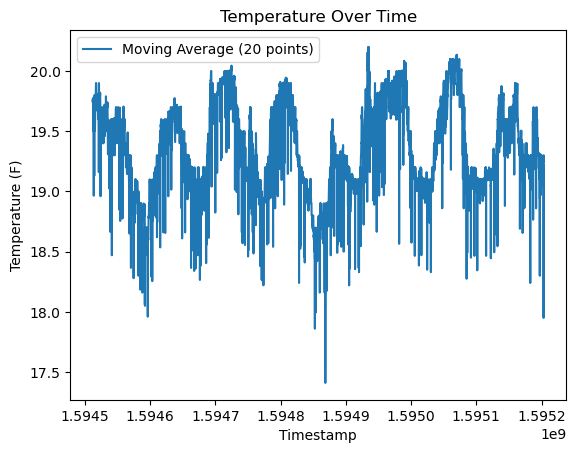

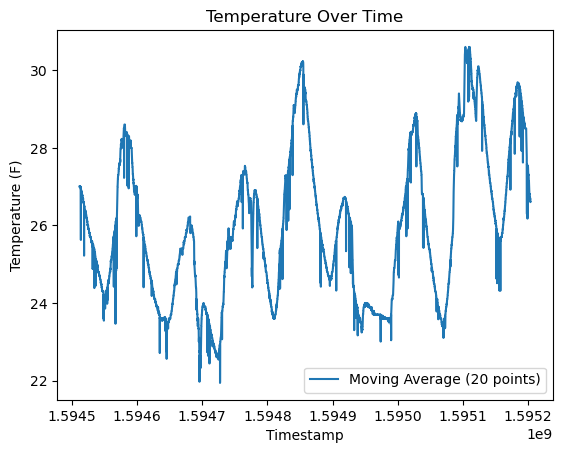

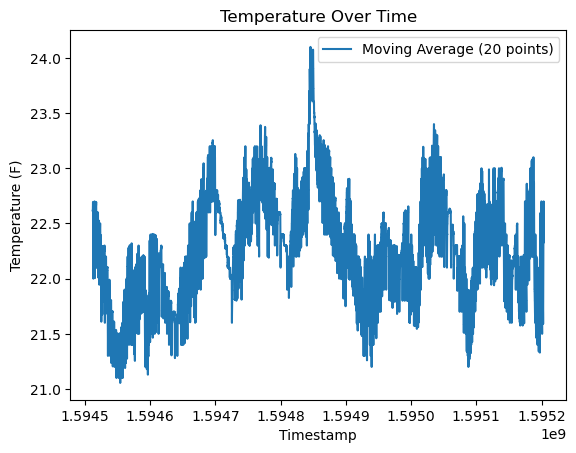

In [27]:
# Moving Average of Temperature vs Time
grouped_df = df.groupby('device')
for device, device_group in grouped_df:
    window_size = 20
    device_group['temp_ma'] = device_group['temp'].rolling(window_size).mean() # Calculating moving average of temp column
    plt.plot(device_group['ts'], device_group['temp_ma'], label=f'Moving Average ({window_size} points)')
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature (F)')
    plt.title('Temperature Over Time')
    plt.legend()
    plt.show()

This looks much better! We can see that the first plot shows a cool, stable environment, the second plot shows an environment highly variable in temperature and the third plot shows a warmer, stable environment. These correspond to the varied environments of each IoT device described above!

### What else can we visualize? Let's take a look at the CO levels described in the dataset!

In the same manner as before, we can use the dataframe grouped by device name to plot the CO level distributions read from each IoT device separately. Let's use the matplotlib library to create a histogram of this data!

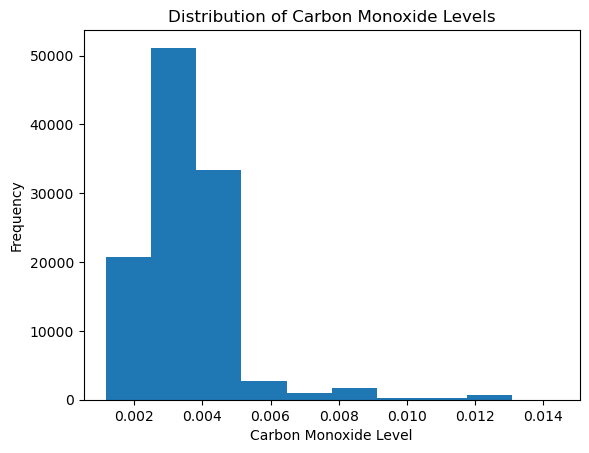

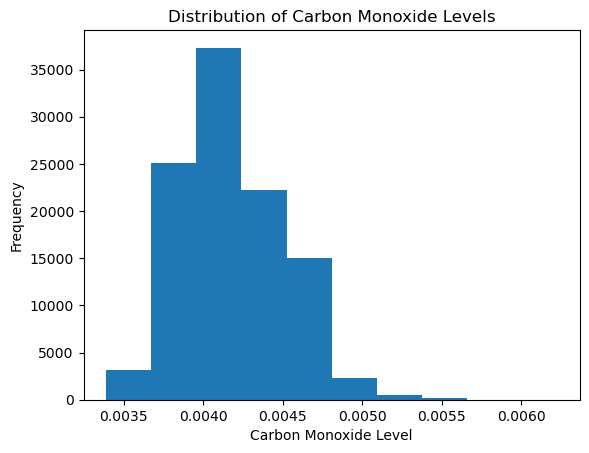

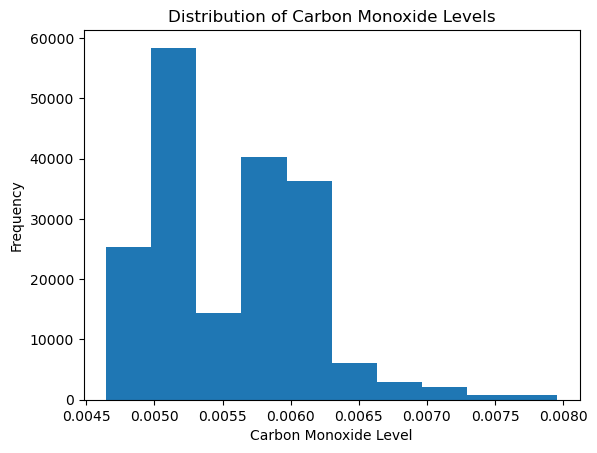

In [28]:
for device, device_group in grouped_df:
    # Carbon Monoxide Level Distribution
    plt.hist(device_group['co'], bins=10)
    plt.xlabel('Carbon Monoxide Level')
    plt.ylabel('Frequency')
    plt.title('Distribution of Carbon Monoxide Levels')
    plt.show()

### Your turn! Let's see if you can make similar histograms, visualizing the distributions of LPG and smoke for each IoT device!

In [29]:
# Answer Key - Uncomment code below to see the plots!

# for device, device_group in grouped_df:
#     # Liquid Petroleum Gas Level Distribution
#     plt.hist(device_group['lpg'], bins=10)
#     plt.xlabel('Liquid Petroleum Gas Level')
#     plt.ylabel('Frequency')
#     plt.title('Distribution of Liquid Petroleum Gas Levels')
#     plt.show()
    
# for device, device_group in grouped_df:
#     # Smoke Level Distribution
#     plt.hist(device_group['smoke'], bins=10)
#     plt.xlabel('Smoke Level')
#     plt.ylabel('Frequency')
#     plt.title('Distribution of Smoke Levels')
#     plt.show()

## A deeper look into more visualization modules:

A scatter plot displaying the relationship between the humidity and temperature of each environmental condition can also be determined from the data. Let's attempt to visualize this correlation for each IoT device using the matplotlib library again!

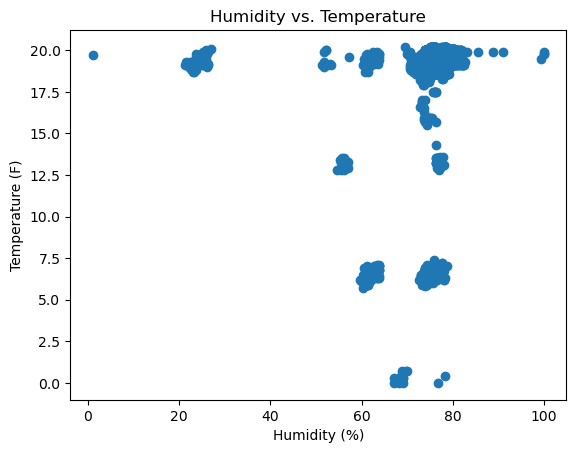

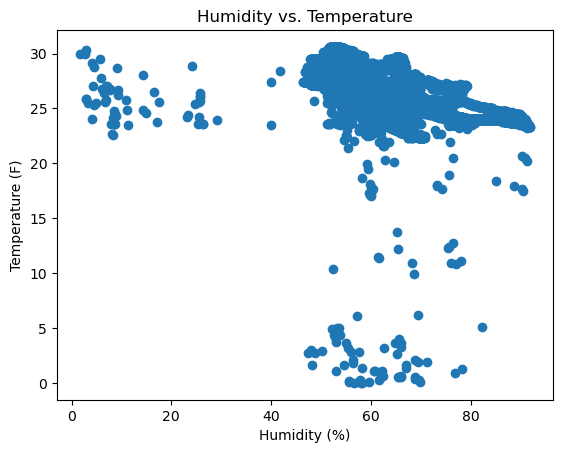

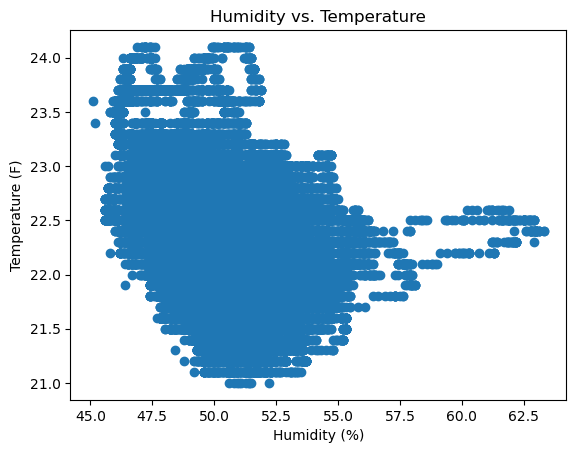

In [30]:
for device, device_group in grouped_df:
    # Humidity vs Temperature Scatter
    plt.scatter(device_group['humidity'], device_group['temp'])
    plt.xlabel('Humidity (%)')
    plt.ylabel('Temperature (F)')
    plt.title('Humidity vs. Temperature')
    plt.show()

We can see from the scatter plots that the first device corresponds to a cooler and more humid environment, the second device varies highly in temperature and humidity, and the third device corresponds to a warmer and drier environment. This, again, matches the description of the environments that the IoT devices were placed in!

### Let's try this again using Bokeh (another Python visualization module) this time!

In [34]:
# Loading in Bokeh plotting libraries
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

for device, device_group in grouped_df:
    # Humidity vs Temperature Scatter
    plot = figure(title='Humidity vs. Temperature', x_axis_label='Humidity (%)', y_axis_label='Temperature (F)')
    plot.scatter(x=device_group['humidity'], y=device_group['temp'], size=8, color='blue', alpha=0.6)
    output_notebook()
    show(plot)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

### So... what are the differences then?

- Bokeh has more interactive features for the user to view their data visualization (e.g. pan, box zoom, wheel zoom, etc.)
- Matplotlib code is easier to write and understand, allowing us to comprehensively make a wide range of visualizations (e.g. line, scatter, bar, histogram, etc.)
- Bokeh has a greater ability for customization in plots, allowing us to make more meaningful analyses 
    - For example, each data point in the scatter plots were made to be partially transparent so that we can visualize the density of data points in certain areas
    
Both are standard Python libraries that are used for data visualization, but it is up to you to decide which is best for your specific use case!